# Airbnb Dublin Dataset Analysis Project
In this notebook, you will analyze the dataset by cleaning and answering 15 questions.
Please write your code in the provided cells for each question.
use appropriate plots to visualize the data, and explain your findings.

- BONUS - wrap your code with functions when possible and suitable. (only general functions, not specific to a question)

## Importing Libraries 


In [1]:
!python -m pip install openpyxl


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!python -m pip install seaborn



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!python -m pip install nltk spacy wordcloud
!python -m spacy download en_core_web_sm


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
     -- ------------------------------------- 0.8/12.8 MB 2.9 MB/s eta 0:00:05
     -- ------------------------------------- 0.8/12.8 MB 2.9 MB/s eta 0:00:05
     -- ------------------------------------- 0.8/12.8 MB 2.9 MB/s eta 0:00:05
     --- ----------------------------------- 1.0/12.8 MB 971.0 kB/s eta 0:00:13
     --- ----------------------------------- 1.0/12.8 MB 971.0 kB/s eta 0:00:13
     ---- ----------------------------------- 1.6/12.8 MB 1.1 MB/s eta 0:00:11
     ----- ---------------------------------- 1.8/12.8 MB 1.1 MB/s eta 0:00:10
     ----- ---------------------------------- 1.8/12.8 MB 1.1 MB/s eta 0:00:10
     -


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
!python -m pip install scikit-learn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
import scipy.stats as stats
import re
import spacy
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from scipy import stats

## Functions Block (If needed)


In [8]:
url_reviews = "https://raw.githubusercontent.com/RaananHileman/Airline-Review-Analysis/main/Airline%20Review%20Analysis/airlines_reviews.csv"
df_reviews = pd.read_csv(url_reviews)
print(df_reviews)


                                     Title              Name Review Date  \
0                       Flight was amazing  Alison Soetantyo  2024-03-01   
1     seats on this aircraft are dreadful      Robert Watson  2024-02-21   
2             Food was plentiful and tasty             S Han  2024-02-20   
3             “how much food was available          D Laynes  2024-02-19   
4          “service was consistently good”         A Othman   2024-02-19   
...                                    ...               ...         ...   
8095                  an uneventful flight         N Vickers  2016-06-20   
8096           Korean Air always impresses      Kim Holloway  2016-06-12   
8097                 didn’t offer anything           C Clark  2016-06-06   
8098       appreciated the service onboard           E Petan  2016-04-21   
8099              genuinely friendly staff           D Lanor  2016-04-12   

                 Airline Verified  \
0     Singapore Airlines     True   
1     Singapo

In [9]:
# Open the files
# df_airlines = pd.read_csv(r"C:\Users\yaelh\OneDrive\Documentos\Data Analyst Course\Python\Final Group Project\airlines_reviews.csv")

In [10]:

url_summary = "https://raw.githubusercontent.com/RaananHileman/Airline-Review-Analysis/main/Airline%20Review%20Analysis/Airline%20Summaries.txt"
df_summary = pd.read_csv(url_summary)
print(df_summary)

              Airline  Airline Code   Total Flights   Min time   Average Time  \
0  Singapore Airlines           SIA            1485         65            136   
1       Qatar Airways           QTR            8037         44            148   
2  All Nippon Airways           ANA            3067         38             90   
3            Emirates           UAE            2393         82            166   
4      Japan Airlines           JAL            2534         44            100   
5      Cathay Pacific           CPA            1324         35            136   
6    Turkish Airlines           THY            2593         58            116   
7          Air France           AFR            4236         39            103   
8         EVA Airways           EVA             734         70            135   
9          Korean Air           KAL             834         54            133   

    Max Time  
0        239  
1        239  
2        238  
3        239  
4        239  
5        239  
6  

In [11]:
print(df_reviews.head())

                                  Title              Name Review Date  \
0                    Flight was amazing  Alison Soetantyo  2024-03-01   
1  seats on this aircraft are dreadful      Robert Watson  2024-02-21   
2          Food was plentiful and tasty             S Han  2024-02-20   
3          “how much food was available          D Laynes  2024-02-19   
4       “service was consistently good”         A Othman   2024-02-19   

              Airline Verified  \
0  Singapore Airlines     True   
1  Singapore Airlines     True   
2  Singapore Airlines     True   
3  Singapore Airlines     True   
4  Singapore Airlines     True   

                                             Reviews Type of Traveller  \
0    Flight was amazing. The crew onboard this fl...      Solo Leisure   
1    Booking an emergency exit seat still meant h...      Solo Leisure   
2    Excellent performance on all fronts. I would...    Family Leisure   
3   Pretty comfortable flight considering I was f...      So

## Data Preprocessing and Cleaning Block



In [12]:
df_reviews.columns

Index(['Title', 'Name', 'Review Date', 'Airline', 'Verified', 'Reviews',
       'Type of Traveller', 'Month Flown', 'Route', 'Class', 'Seat Comfort',
       'Staff Service', 'Food & Beverages', 'Inflight Entertainment',
       'Value For Money', 'Overall Rating', 'Recommended'],
      dtype='object')

In [13]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8100 entries, 0 to 8099
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   8100 non-null   object
 1   Name                    8100 non-null   object
 2   Review Date             8100 non-null   object
 3   Airline                 8100 non-null   object
 4   Verified                8100 non-null   object
 5   Reviews                 8100 non-null   object
 6   Type of Traveller       8100 non-null   object
 7   Month Flown             8100 non-null   object
 8   Route                   8100 non-null   object
 9   Class                   8100 non-null   object
 10  Seat Comfort            8100 non-null   int64 
 11  Staff Service           8100 non-null   int64 
 12  Food & Beverages        8100 non-null   int64 
 13  Inflight Entertainment  8100 non-null   int64 
 14  Value For Money         8100 non-null   int64 
 15  Over

In [14]:
# We want to clean the Route column
valid_routes = df_reviews[df_reviews['Route'].str.count(" to ") == 1].copy()

In [15]:
valid_routes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8088 entries, 0 to 8099
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   8088 non-null   object
 1   Name                    8088 non-null   object
 2   Review Date             8088 non-null   object
 3   Airline                 8088 non-null   object
 4   Verified                8088 non-null   object
 5   Reviews                 8088 non-null   object
 6   Type of Traveller       8088 non-null   object
 7   Month Flown             8088 non-null   object
 8   Route                   8088 non-null   object
 9   Class                   8088 non-null   object
 10  Seat Comfort            8088 non-null   int64 
 11  Staff Service           8088 non-null   int64 
 12  Food & Beverages        8088 non-null   int64 
 13  Inflight Entertainment  8088 non-null   int64 
 14  Value For Money         8088 non-null   int64 
 15  Overall R

In [16]:
valid_routes[['Origin', 'Destination']] = valid_routes['Route'].str.split(" to ", expand=True)


In [17]:
valid_routes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8088 entries, 0 to 8099
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   8088 non-null   object
 1   Name                    8088 non-null   object
 2   Review Date             8088 non-null   object
 3   Airline                 8088 non-null   object
 4   Verified                8088 non-null   object
 5   Reviews                 8088 non-null   object
 6   Type of Traveller       8088 non-null   object
 7   Month Flown             8088 non-null   object
 8   Route                   8088 non-null   object
 9   Class                   8088 non-null   object
 10  Seat Comfort            8088 non-null   int64 
 11  Staff Service           8088 non-null   int64 
 12  Food & Beverages        8088 non-null   int64 
 13  Inflight Entertainment  8088 non-null   int64 
 14  Value For Money         8088 non-null   int64 
 15  Overall R

In [18]:
valid_routes.isnull().sum()

Title                     0
Name                      0
Review Date               0
Airline                   0
Verified                  0
Reviews                   0
Type of Traveller         0
Month Flown               0
Route                     0
Class                     0
Seat Comfort              0
Staff Service             0
Food & Beverages          0
Inflight Entertainment    0
Value For Money           0
Overall Rating            0
Recommended               0
Origin                    0
Destination               0
dtype: int64

In [19]:
print(valid_routes['Airline'].nunique())

10


## Combination of sources


In [20]:
df_merged = pd.merge(valid_routes, df_summary, on="Airline", how="inner")

In [21]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7064 entries, 0 to 7063
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   7064 non-null   object
 1   Name                    7064 non-null   object
 2   Review Date             7064 non-null   object
 3   Airline                 7064 non-null   object
 4   Verified                7064 non-null   object
 5   Reviews                 7064 non-null   object
 6   Type of Traveller       7064 non-null   object
 7   Month Flown             7064 non-null   object
 8   Route                   7064 non-null   object
 9   Class                   7064 non-null   object
 10  Seat Comfort            7064 non-null   int64 
 11  Staff Service           7064 non-null   int64 
 12  Food & Beverages        7064 non-null   int64 
 13  Inflight Entertainment  7064 non-null   int64 
 14  Value For Money         7064 non-null   int64 
 15  Over

## Statistical Check

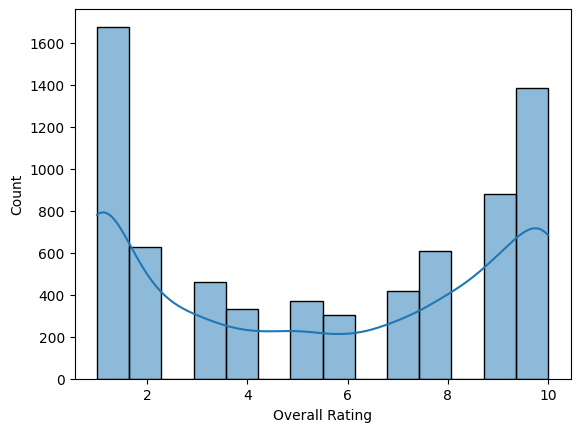

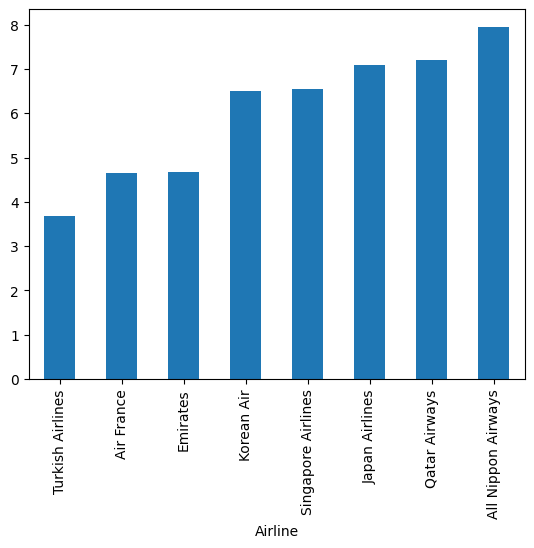

In [22]:
# Exploratory analysis

# Distribution of ratings
sns.histplot(df_merged["Overall Rating"], kde=True)
plt.show()

# Avg rating by airline
df_merged.groupby("Airline")["Overall Rating"].mean().sort_values().plot(kind="bar")
plt.show()

ANOVA F = 204.82379337598618
p-value = 9.743094932817046e-278
Reject H0: significant differences in ratings between airlines


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\yaelh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


sentiment_label
positive    4271
negative    2693
neutral      100
Name: count, dtype: int64


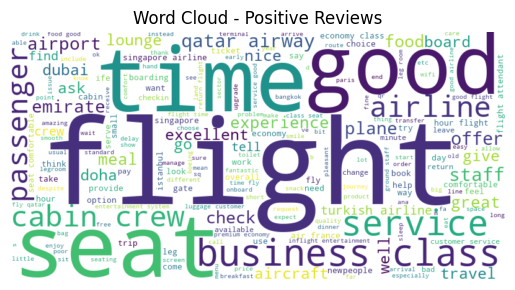

Topic 1:  ['gate', 'bag', 'staff', 'check', 'luggage', 'time', 'delay', 'airport', 'hour', 'flight']
Topic 2:  ['doha', 'time', 'crew', 'business', 'food', 'class', 'service', 'good', 'seat', 'flight']
Topic 3:  ['istanbul', 'food', 'cabin', 'staff', 'fly', 'crew', 'flight', 'singapore', 'service', 'airline']
Topic 4:  ['air', 'singapore', 'service', 'good', 'airline', 'fly', 'food', 'economy', 'flight', 'seat']
Topic 5:  ['pay', 'tell', 'book', 'change', 'service', 'seat', 'customer', 'ticket', 'airline', 'flight']


In [23]:
# ======================
# 1️⃣ FORMAL STATISTICAL TEST
# ======================

# ANOVA to see if the mean "Overall Rating" differs between airlines
# H0: All airlines have the same average rating.
# H1: At least one airline has a different mean rating
# This gives a statistical foundation before interpreting differences between airlines.


anova_result = stats.f_oneway(
    *[df_merged[df_merged["Airline"] == airline]["Overall Rating"] 
      for airline in df_merged["Airline"].unique()]
)

print("ANOVA F =", anova_result.statistic)
print("p-value =", anova_result.pvalue)

if anova_result.pvalue < 0.05:
    print("Reject H0: significant differences in ratings between airlines")
else:
    print("Fail to reject H0: no sufficient evidence of differences")

# ======================
# 2️⃣ TEXT CLEANING
# ======================

nlp = spacy.load("en_core_web_sm")

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # remove punctuation
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop]
    return " ".join(tokens)

df_merged["Reviews_clean"] = df_merged["Reviews"].apply(clean_text)

# ======================
# 3️⃣ SENTIMENT ANALYSIS
# ======================
# Reviews contain subjective opinions. Using sentiment analysis lets us quantify positive, negative, and neutral sentiments in text reviews, which provides a high-level view of customer satisfaction.

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

df_merged["sentiment_score"] = df_merged["Reviews"].apply(lambda x: sia.polarity_scores(x)["compound"])
df_merged["sentiment_label"] = df_merged["sentiment_score"].apply(
    lambda s: "positive" if s > 0.05 else "negative" if s < -0.05 else "neutral"
)

print(df_merged["sentiment_label"].value_counts())

# ======================
# 4️⃣ WORD CLOUD FOR POSITIVE REVIEWS
# ======================
# To understand frequent themes in reviews, we applied word clouds and LDA.
# Word clouds visualize the most common words quickly.

text_positive = " ".join(df_merged[df_merged["sentiment_label"]=="positive"]["Reviews_clean"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text_positive)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Positive Reviews")
plt.show()

# ======================
# 5️⃣ TOPIC MODELING (LDA)
# ======================
# LDA uncovers underlying topics or recurring themes in customer feedback, helping identify strengths (e.g., “service”, “business class”) and weaknesses (e.g., “delay”, “bag”).

vectorizer = CountVectorizer(max_df=0.9, min_df=10, stop_words="english")
X = vectorizer.fit_transform(df_merged["Reviews_clean"])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

words = vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx+1}: ", [words[i] for i in topic.argsort()[-10:]])


## Conclusions

## Conclusions, insights and actions

ANOVA:

F = 204.82, p-value ≈ 0 → very small.

We reject H0: there are significant differences in overall ratings among airlines.

Interpretation: Some airlines are rated consistently higher or lower than others; this is statistically significant.

SENTIMENT ANALYSIS:

- Positive: 4271

- Negative: 2693

- Neutral: 100

Interpretation: Most reviews are positive, suggesting general satisfaction, but a significant portion of negative reviews indicates areas for improvement.

WORD CLOUD:

Most frequent words: flight, good, time, seat, service, business class, well

Interpretation: Customers often comment on flights, seating comfort, service quality, and overall experience.

TOPIC MODELING LDA:

Topic 1: airport logistics, delays, luggage, gate → issues with airport operations and timing.

Topic 2: Doha, crew, business class, food → premium cabin experience and crew service.

Topic 3: Istanbul, cabin, food, staff → regional experiences and service quality.

Topic 4: airline service, economy, flight → overall service and seating comfort.

Topic 5: payment, booking, ticket changes → customer service and transactional issues.

Interpretation: Reviews cluster around service quality, flight experience, and operational issues.


SUMMARY CONCLUSIONS:

There are significant differences in overall ratings between airlines.

Most reviews are positive, but negative feedback highlights pain points like delays and baggage handling.

Main themes of reviews include airport operations, cabin service, food, seating comfort, and booking/payment issues.

Combining statistical tests with NLP allows a quantitative and qualitative understanding of customer satisfaction.

